In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
from config import weather_api_key
import requests

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
#  random lat/long sets
lats = np.random.uniform(low= -90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_longs = list(zip(lats, longs))
lats_longs

[(32.776068661461366, -6.531949416696449),
 (-54.8145413005592, -149.07580694160737),
 (-37.06309117771666, -106.50566817780886),
 (-2.3939568105484597, 43.78225932637474),
 (-76.9037099000994, 81.01286466661423),
 (-47.83972328876967, -159.01163727300516),
 (-3.183380810517363, -168.88352611515268),
 (28.686084384739033, 73.31330991167508),
 (38.547855249519756, -6.067964558979952),
 (37.416190458409616, 43.59303251010539),
 (54.48927190445545, -122.83775007794557),
 (-65.78841553538263, 166.66947653931015),
 (51.49544177239247, -16.209162513500104),
 (-3.086432255010024, 113.58757870853555),
 (-29.938088125067168, 165.40872269567546),
 (-53.334934240372604, -18.027634666784593),
 (-13.375026435472321, 67.94527129083116),
 (36.94004229477471, -154.80874709514893),
 (-4.005414595441877, 111.05867645464468),
 (-78.73473715801133, 153.9482341276955),
 (-66.04142674260905, -174.94377931494057),
 (-44.152255766502115, -73.62965052012787),
 (-0.18267837428885514, -103.41379841982408),
 (84.

In [5]:
# Create a list to hold cities
cities = []

# identify each city nearest to each set of coordinates
for coordinates in lats_longs:
    city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
    
    if city not in cities:
        cities.append(city)
len(cities)

580

In [7]:
# 1. Create empty city list to hold cities
city_data = []

# print the start of logging
print("Beginning Data Retrieval")
print("------------------------")

# create counters for looping through cities
record_count = 1
set_count = 1

# 2. loop through cities
for i, city in enumerate(cities):
    # 3. group cities in sets of 50
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count += 1
        time.sleep(60)

# 4. build city url endpoint for each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # 5. log the url and record/set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # add 1 to record count
    record_count += 1
    
    # 6. Run an API request for each of the cities.
    try:
        # 6. Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # 7. Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # 8. Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | mrirt
City not found. Skipping...
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | bur gabo
City not found. Skipping...
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | saleaula
City not found. Skipping...
Processing Record 7 of Set 1 | anupgarh
Processing Record 8 of Set 1 | villafranca de los barros
Processing Record 9 of Set 1 | hakkari
Processing Record 10 of Set 1 | prince george
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | dingle
Processing Record 13 of Set 1 | kualakapuas
Processing Record 14 of Set 1 | vao
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | grand gaube
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | pangkalanbuun
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | puerto

Processing Record 190 of Set 4 | vangaindrano
Processing Record 191 of Set 4 | samusu
City not found. Skipping...
Processing Record 192 of Set 4 | shizunai
Processing Record 193 of Set 4 | falam
Processing Record 194 of Set 4 | poltavka
Processing Record 195 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 196 of Set 4 | jaicos
Processing Record 197 of Set 4 | luderitz
Processing Record 198 of Set 4 | pangai
Processing Record 199 of Set 4 | kavieng
Processing Record 200 of Set 4 | chernyshevskiy
Processing Record 201 of Set 4 | nantucket
Processing Record 202 of Set 4 | kavaratti
Processing Record 203 of Set 4 | flinders
Processing Record 205 of Set 5 | pevek
Processing Record 206 of Set 5 | east london
Processing Record 207 of Set 5 | bonito
Processing Record 208 of Set 5 | phangnga
Processing Record 209 of Set 5 | sompeta
Processing Record 210 of Set 5 | maniitsoq
Processing Record 211 of Set 5 | lewistown
Processing Record 212 of Set 5 | hithadhoo
Processing Record 

Processing Record 379 of Set 8 | ambon
Processing Record 380 of Set 8 | pedernales
Processing Record 381 of Set 8 | hohhot
Processing Record 382 of Set 8 | rawson
Processing Record 383 of Set 8 | cloquet
Processing Record 384 of Set 8 | sarkand
Processing Record 385 of Set 8 | naze
Processing Record 386 of Set 8 | neiafu
Processing Record 387 of Set 8 | shubarkuduk
Processing Record 388 of Set 8 | yaring
Processing Record 389 of Set 8 | vryburg
Processing Record 390 of Set 8 | praia
Processing Record 391 of Set 8 | suntar
Processing Record 392 of Set 8 | lalibela
Processing Record 393 of Set 8 | muros
Processing Record 394 of Set 8 | kaduqli
Processing Record 395 of Set 8 | doctor pedro p. pena
City not found. Skipping...
Processing Record 396 of Set 8 | kemijarvi
Processing Record 397 of Set 8 | la ferte-bernard
Processing Record 398 of Set 8 | nerchinskiy zavod
Processing Record 399 of Set 8 | mount gambier
Processing Record 400 of Set 8 | amahai
Processing Record 401 of Set 8 | imbi

Processing Record 566 of Set 12 | san carlos de bariloche
Processing Record 567 of Set 12 | upington
Processing Record 568 of Set 12 | koeru
Processing Record 569 of Set 12 | haibowan
City not found. Skipping...
Processing Record 570 of Set 12 | la rochelle
Processing Record 571 of Set 12 | kushima
Processing Record 572 of Set 12 | minot
Processing Record 573 of Set 12 | abha
Processing Record 574 of Set 12 | srednekolymsk
Processing Record 575 of Set 12 | kindu
Processing Record 576 of Set 12 | kumbo
Processing Record 577 of Set 12 | sur
Processing Record 578 of Set 12 | bahia blanca
Processing Record 579 of Set 12 | sokolo
Processing Record 580 of Set 12 | talara
Processing Record 581 of Set 12 | honningsvag
Processing Record 582 of Set 12 | harper
Processing Record 583 of Set 12 | champerico
Processing Record 584 of Set 12 | taltal
Processing Record 585 of Set 12 | ixtapa
Processing Record 586 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 587 of Set 12

In [8]:
# convert the array of JSON dict into dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,62.91,48,4,2.19,NZ,2022-05-03 01:04:26
1,Rikitea,-23.1203,-134.9692,77.45,71,100,11.88,PF,2022-05-03 01:02:26
2,Busselton,-33.6500,115.3333,60.19,67,12,10.20,AU,2022-05-03 01:04:27
3,Anupgarh,29.1911,73.2086,83.89,26,0,7.78,IN,2022-05-03 01:04:28
4,Villafranca De Los Barros,38.5614,-6.3381,52.39,76,87,7.29,ES,2022-05-03 01:04:28


In [9]:
# reorder columns
city_data2_df = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data2_df = city_data_df[city_data2_df]

In [10]:
city_data2_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-05-03 01:04:26,-46.1927,168.8643,62.91,48,4,2.19
1,Rikitea,PF,2022-05-03 01:02:26,-23.1203,-134.9692,77.45,71,100,11.88
2,Busselton,AU,2022-05-03 01:04:27,-33.6500,115.3333,60.19,67,12,10.20
3,Anupgarh,IN,2022-05-03 01:04:28,29.1911,73.2086,83.89,26,0,7.78
4,Villafranca De Los Barros,ES,2022-05-03 01:04:28,38.5614,-6.3381,52.39,76,87,7.29
5,Hakkari,TR,2022-05-03 01:04:29,37.5833,44.1667,46.11,92,95,4.00
6,Prince George,CA,2022-05-03 01:00:27,53.9166,-122.7530,51.24,71,75,9.22
7,Bluff,NZ,2022-05-03 01:04:30,-46.6000,168.3333,58.55,63,8,6.46
8,Dingle,PH,2022-05-03 01:04:31,10.9995,122.6711,84.83,72,91,8.23
9,Kualakapuas,ID,2022-05-03 01:04:31,-3.0091,114.3876,84.00,72,37,3.06


In [11]:
# create file output and save city_data2_df in the csv
save_file = "weather_data/cities.csv"
city_data2_df.to_csv(save_file, index_label="City ID")

In [12]:
# begin plotting from dataframe; start with lat vs max temp
lats = city_data2_df["Lat"]
max_temp = city_data2_df["Max Temp"]
humidity = city_data2_df["Humidity"]
clouds = city_data2_df["Cloudiness"]
wind_speed = city_data2_df["Wind Speed"]

today = time.strftime("%x")
today


'05/02/22'

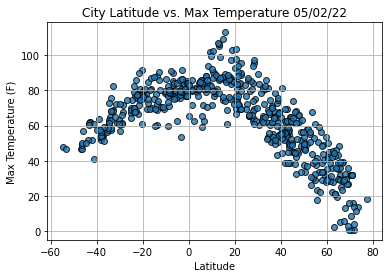

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temp,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_v_maxtemp.png")

# Show plot.
plt.show()

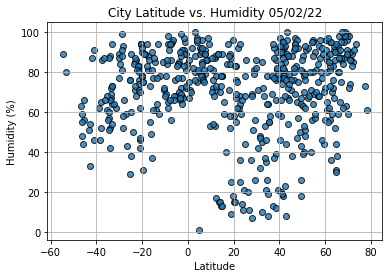

In [13]:
# scatter plot for latitude and humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Format graph.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_v_humidity.png")

# Show plot.
plt.show()

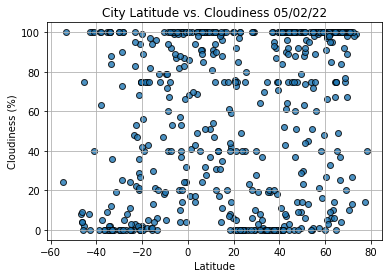

In [14]:
# plot latitude v. cloudiness
plt.scatter(lats,
            clouds,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Format graph.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_v_cloudiness.png")

# Show plot.
plt.show()

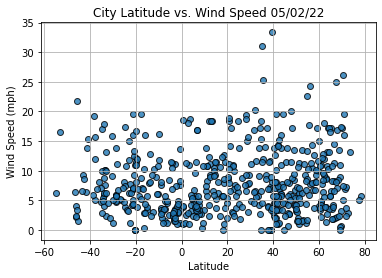

In [15]:
# plot lat v windspeed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Format graph.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_v_windspeed.png")

# Show plot.
plt.show()